Tests with Big Buck Bunny, 1920x1080 @ 30fps

Download from http://bbb3d.renderfarming.net/download.html (263 MB)

In [6]:
big_buck_bunny = 'C:\\data\\bbb_sunflower_1080p_30fps_normal.mp4'

def frame2sum(frame):
    return frame.sum()

In [7]:
from vid2sound import video2array_async

%time samples = video2array_async(big_buck_bunny, frame2sum)

Number of frames: 19036
Wall time: 4min 12s


DescribeResult(nobs=19036, minmax=(-658717193.013921, 805146184.986079), mean=-7.695123712964908e-08, variance=9.68016823192077e+16, skewness=0.05881030271128782, kurtosis=-0.6101307686786703)


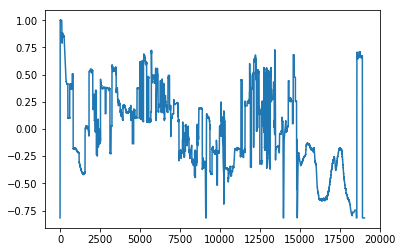

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import describe

print(describe(samples))

# remove offset:
samples = samples - samples.mean()

# normalize to fit in [-1, 1]
samples = samples / max(abs(samples.min()), samples.max())

plt.plot(samples)
plt.show()

In [18]:
from scipy.io import wavfile

wavfile.write('test.wav', 44100, samples)

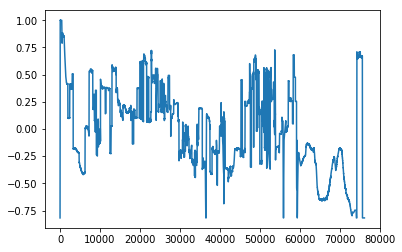

In [29]:
import numpy as np

t = np.linspace(0, len(samples), len(samples))
t_stretched = np.linspace(0, len(samples), 4 * len(samples))

samples_stretched = np.interp(t_stretched, t, samples)

plt.plot(samples_stretched)
plt.show()

wavfile.write('test_stretched.wav', 44100, samples_stretched)